## Assignment 1  Exercise 4
### Yagublu Jeyhun

In [177]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

from sklearn.decomposition import PCA

pd.set_option('display.expand_frame_repr', False)
%matplotlib inline

In [178]:
data= { 'name' :['Clover','Sunny','Rose','Daisy','Strawberry','Molly'],
     'race' :['Holstein','Ayrshire','Holstein','Ayrshire','Finncattle','Ayrshire'],
      'age' :[2,2,5,4,7,8],
      'milk/d' :[20,10,15,25,35,45],
      'character' :['lively','kind','calm','calm','calm','kind'],
      'music' :['rock','rock','country','classical','classical','country']}
data=pd.DataFrame(data)
data

,name,race,age,milk/d,character,music
0,Clover,Holstein,2,20,lively,rock
1,Sunny,Ayrshire,2,10,kind,rock
2,Rose,Holstein,5,15,calm,country
3,Daisy,Ayrshire,4,25,calm,classical
4,Strawberry,Finncattle,7,35,calm,classical
5,Molly,Ayrshire,8,45,kind,country


### 4A

* We use age and milk/d and compute their min-max scaling

In [179]:
age=data['age'].values.astype(np.float64)
milk=data['milk/d'].values.astype(np.float64)

In [180]:
std_age=np.std(age)
mean_age=np.mean(age)

* I define a function to calculate the min-max scaling of an array

In [181]:
def min_max_scaling(array):
    print(np.amin(array),np.amax(array))
    minn=np.amin(array)
    maxx=np.amax(array)
    for i in range (0,array.size):
        array[i]=(array[i]-minn)/(maxx-minn)
    return array


In [182]:
age=min_max_scaling(age) 
milk=min_max_scaling(milk)


2.0 8.0
10.0 45.0


* We find the min-max scaled values of milk\d and age feautures

In [183]:
milk

array([0.28571429, 0.        , 0.14285714, 0.42857143, 0.71428571,
       1.        ])

In [184]:
age

array([0.        , 0.        , 0.5       , 0.33333333, 0.83333333,
       1.        ])

* We compute euclidean distance of cows using this two features vectors

In [185]:
euc_dist_numerical=np.empty((15,),dtype=object)
count=0
for i in range (0,6):
    for j in range (i+1,6):
        dist=(((age[i]-age[j])**2) + ((milk[i]-milk[j])**2))**0.5
        euc_dist_numerical[count]=[data.loc[i,'name'],data.loc[j,'name'],dist]
        count+=1
euc_dist_numerical        
        

array([list(['Clover', 'Sunny', 0.2857142857142857]),
       list(['Clover', 'Rose', 0.5200078492343227]),
       list(['Clover', 'Daisy', 0.3626558621839956]),
       list(['Clover', 'Strawberry', 0.9370794597216394]),
       list(['Clover', 'Molly', 1.228903609577518]),
       list(['Sunny', 'Rose', 0.5200078492343227]),
       list(['Sunny', 'Daisy', 0.5429406786186372]),
       list(['Sunny', 'Strawberry', 1.0975648163443914]),
       list(['Sunny', 'Molly', 1.4142135623730951]),
       list(['Rose', 'Daisy', 0.33077247593928105]),
       list(['Rose', 'Strawberry', 0.6615449518785621]),
       list(['Rose', 'Molly', 0.9923174278178433]),
       list(['Daisy', 'Strawberry', 0.5758755534498964]),
       list(['Daisy', 'Molly', 0.8780518530755131]),
       list(['Strawberry', 'Molly', 0.33077247593928105])], dtype=object)

### 4B

 * Goodall distance is $d=1-g$ 
 * First we find Goodall similarity $g$ :
                 sum(1-pi^2(shared value))/feautures 

* We define vectors corresponding categorical features

In [186]:
race=data['race'].values
character=data['character'].values
music=data['music'].values

* We define frequncies data  

In [187]:
freq_p={'lively': 1/6,
       'kind' :2/6,
       'calm' :3/6,
        'rock' :2/6,
        'country' :2/6,
        'classical' :2/6,
        'Holstein' :2/6,
        'Ayrshire' :3/6,
        'Finncattle' :1/6,
       }

* I define a function to check if the feauture has shared value between the given cows

In [188]:
def shr_chk (a ,b) :
    if (a==b) :
        return 1
    else :
        return 0


* We calculate the goodall similarity and distances between the cows

In [189]:
gdall_dist_categorical=np.empty((15,),dtype=object)
count=0
for i in range (0,6):
    for j in range (i+1,6):
        sml= (( (1-freq_p[race[i]]**2))/3)*shr_chk(race[i],race[j])+(( (1-freq_p[character[i]]**2))/3)*shr_chk(character[i],character[j]) +  (( (1-freq_p[music[i]]**2))/3)*shr_chk(music[i],music[j])#similarity
        dist=1-sml
        gdall_dist_categorical[count]=[data.loc[i,'name'],data.loc[j,'name'],sml,dist]
        count+=1
gdall_dist_categorical    
        

array([list(['Clover', 'Sunny', 0.2962962962962963, 0.7037037037037037]),
       list(['Clover', 'Rose', 0.2962962962962963, 0.7037037037037037]),
       list(['Clover', 'Daisy', 0.0, 1.0]),
       list(['Clover', 'Strawberry', 0.0, 1.0]),
       list(['Clover', 'Molly', 0.0, 1.0]),
       list(['Sunny', 'Rose', 0.0, 1.0]),
       list(['Sunny', 'Daisy', 0.25, 0.75]),
       list(['Sunny', 'Strawberry', 0.0, 1.0]),
       list(['Sunny', 'Molly', 0.5462962962962963, 0.4537037037037037]),
       list(['Rose', 'Daisy', 0.25, 0.75]),
       list(['Rose', 'Strawberry', 0.25, 0.75]),
       list(['Rose', 'Molly', 0.2962962962962963, 0.7037037037037037]),
       list(['Daisy', 'Strawberry', 0.5462962962962963, 0.4537037037037037]),
       list(['Daisy', 'Molly', 0.25, 0.75]),
       list(['Strawberry', 'Molly', 0.0, 1.0])], dtype=object)

### 4C

* Now we use both numerical and categorical features

* We define lambda and create dictionaries of distances which we will use to calculate the combined distances between cows

In [190]:
lamb_da=2/5
keys= ['name1','name2','dist'] 
dict_numdist=dict(zip(keys, zip(*euc_dist_numerical)))
keys=['name1','name2','similarity','dist']
dict_catdist=dict(zip(keys,zip(*gdall_dist_categorical)))

* We calculate the variances of the distances corresponding to numerical and categorical features

In [191]:
std_numdist=np.std(dict_numdist['dist'], ddof=1)

In [192]:
std_catdist=np.std(dict_catdist['dist'],ddof=1)

* We calculate the combined distances with the given equation from the book

In [193]:
mixed_dist=np.empty((15,),dtype=object)
count=0 
for i in range(0,6) :
    for j in range(i+1,6):
        dist=lamb_da/std_numdist*euc_dist_numerical[count][2] + (1-lamb_da)/std_catdist*gdall_dist_categorical[count][3]
        mixed_dist[count]=[data.loc[i,'name'],data.loc[j,'name'],dist]
        count+=1
    

In [194]:
mixed_dist

array([list(['Clover', 'Sunny', 2.515987523913735]),
       list(['Clover', 'Rose', 2.778553755452394]),
       list(['Clover', 'Daisy', 3.5267592789551756]),
       list(['Clover', 'Strawberry', 4.170499708894216]),
       list(['Clover', 'Molly', 4.49753885648513]),
       list(['Sunny', 'Rose', 3.7030992417104516]),
       list(['Sunny', 'Daisy', 2.9487141669744856]),
       list(['Sunny', 'Strawberry', 4.350351151129717]),
       list(['Sunny', 'Molly', 3.0005797877576317]),
       list(['Rose', 'Daisy', 2.7109432073591795]),
       list(['Rose', 'Strawberry', 3.0816306526276502]),
       list(['Rose', 'Molly', 3.3078578656683]),
       list(['Daisy', 'Strawberry', 2.0610778720775538]),
       list(['Daisy', 'Molly', 3.3242638700977265]),
       list(['Strawberry', 'Molly', 3.4910284613894156])], dtype=object)

### 4D i


* We create histograms of different distance methods

In [195]:
keys=['name1','name2','dist']
dict_mixeddist=dict(zip(keys,zip(*mixed_dist)))

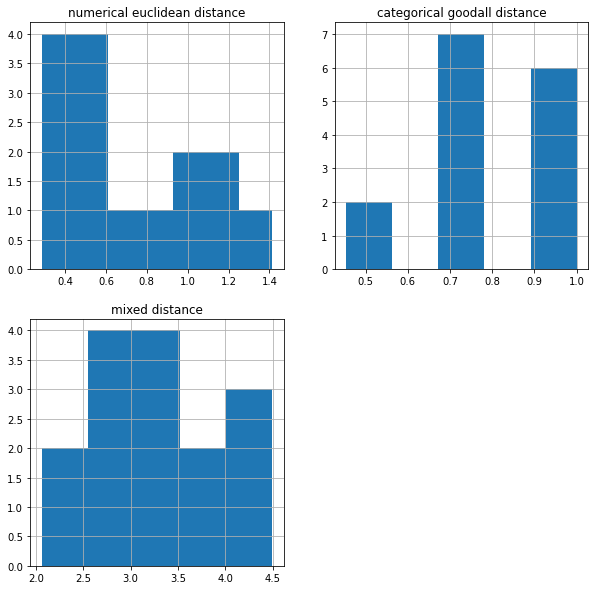

In [196]:

fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
pd.DataFrame.from_dict(dict_numdist)['dist'].hist(bins=7)
plt.title('numerical euclidean distance')
plt.subplot(2,2,2)
pd.DataFrame.from_dict(dict_catdist)['dist'].hist(bins=5)
plt.title('categorical goodall distance')
plt.subplot(2,2,3)
pd.DataFrame.from_dict(dict_mixeddist)['dist'].hist(bins=5)
plt.title('mixed distance')
plt.show()

* We can see that Mixed and Numerical measure fits best for clustering and we can clearly see 2 peaks with comparably big values.

### 4D ii

* to plot the graphs I use the networkx library

In [197]:
import networkx as nx

#### Clustering with Categorical distance

In [198]:
G=nx.Graph()

In [199]:
G.add_nodes_from(data['name'])

* I create the distances data frames to use in calculations

In [200]:
numeric_dist_df=pd.DataFrame.from_dict(dict_numdist)
categorical_dist_df=pd.DataFrame.from_dict(dict_catdist)
mixed_dist_df=pd.DataFrame.from_dict(dict_mixeddist)


* I add the edges to our graph which has weight corresponding to the distances between nodes (cows)

In [201]:
for i in range(0,15):
     G.add_edge(gdall_dist_categorical[i][0],gdall_dist_categorical[i][1],weight=gdall_dist_categorical[i][3])
   # G.add_edge(categorical_dist_df['name1'] ,categorical_dist_df['name2'],weight=categorical_dist_df['dist'])

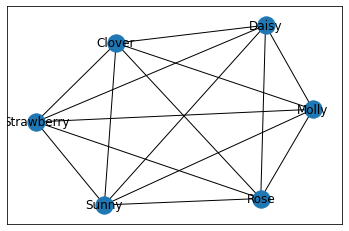

In [202]:
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
#nx.draw(G,with_labels=True)

In [203]:
edges=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1),reverse=True)

In [204]:
edges


[('Clover', 'Daisy', {'weight': 1.0}),
 ('Clover', 'Strawberry', {'weight': 1.0}),
 ('Clover', 'Molly', {'weight': 1.0}),
 ('Sunny', 'Rose', {'weight': 1.0}),
 ('Sunny', 'Strawberry', {'weight': 1.0}),
 ('Strawberry', 'Molly', {'weight': 1.0}),
 ('Sunny', 'Daisy', {'weight': 0.75}),
 ('Rose', 'Daisy', {'weight': 0.75}),
 ('Rose', 'Strawberry', {'weight': 0.75}),
 ('Daisy', 'Molly', {'weight': 0.75}),
 ('Clover', 'Sunny', {'weight': 0.7037037037037037}),
 ('Clover', 'Rose', {'weight': 0.7037037037037037}),
 ('Rose', 'Molly', {'weight': 0.7037037037037037}),
 ('Sunny', 'Molly', {'weight': 0.4537037037037037}),
 ('Daisy', 'Strawberry', {'weight': 0.4537037037037037})]

In [205]:
G.remove_edge('Clover','Daisy')
G.remove_edge('Clover','Strawberry')
G.remove_edge('Clover', 'Molly')
G.remove_edge('Sunny', 'Rose')
G.remove_edge('Sunny', 'Strawberry')
G.remove_edge('Strawberry', 'Molly')
G.remove_edge('Sunny', 'Daisy')
G.remove_edge('Rose', 'Daisy')
G.remove_edge('Rose', 'Strawberry')
G.remove_edge('Daisy','Molly')


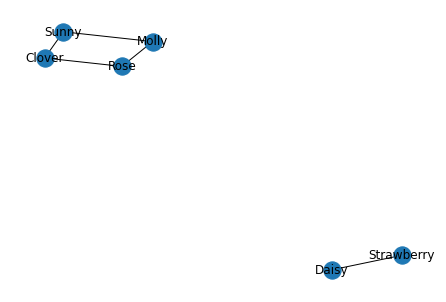

In [206]:
nx.draw(G,with_labels = True)

#### Clustering for numerical euc distance

In [207]:
G_num=nx.Graph()
G_num.add_nodes_from(data['name'])
for i in range(0,15):
     G_num.add_edge(euc_dist_numerical[i][0],euc_dist_numerical[i][1],weight=euc_dist_numerical[i][2])
   



In [208]:
edges=sorted(G_num.edges(data=True), key=lambda t: t[2].get('weight', 1),reverse=True)

edges



[('Sunny', 'Molly', {'weight': 1.4142135623730951}),
 ('Clover', 'Molly', {'weight': 1.228903609577518}),
 ('Sunny', 'Strawberry', {'weight': 1.0975648163443914}),
 ('Rose', 'Molly', {'weight': 0.9923174278178433}),
 ('Clover', 'Strawberry', {'weight': 0.9370794597216394}),
 ('Daisy', 'Molly', {'weight': 0.8780518530755131}),
 ('Rose', 'Strawberry', {'weight': 0.6615449518785621}),
 ('Daisy', 'Strawberry', {'weight': 0.5758755534498964}),
 ('Sunny', 'Daisy', {'weight': 0.5429406786186372}),
 ('Clover', 'Rose', {'weight': 0.5200078492343227}),
 ('Sunny', 'Rose', {'weight': 0.5200078492343227}),
 ('Clover', 'Daisy', {'weight': 0.3626558621839956}),
 ('Rose', 'Daisy', {'weight': 0.33077247593928105}),
 ('Strawberry', 'Molly', {'weight': 0.33077247593928105}),
 ('Clover', 'Sunny', {'weight': 0.2857142857142857})]

In [209]:
G_num.remove_edge('Sunny','Molly')
G_num.remove_edge('Clover','Molly')
G_num.remove_edge('Sunny','Strawberry')
G_num.remove_edge('Rose','Molly')
G_num.remove_edge('Clover','Strawberry')
G_num.remove_edge('Daisy','Molly')
G_num.remove_edge('Rose','Strawberry')
G_num.remove_edge('Daisy','Strawberry')

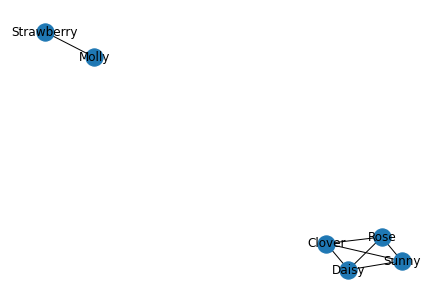

In [210]:

nx.draw(G_num,with_labels = True)

#### Clustering according to the mixed distances

In [211]:
G_mixed=nx.Graph()
G_mixed.add_nodes_from(data['name'])
for i in range(0,15):
     G_mixed.add_edge(mixed_dist[i][0],mixed_dist[i][1],weight=mixed_dist[i][2])  


In [212]:
edges=sorted(G_mixed.edges(data=True), key=lambda t: t[2].get('weight', 1),reverse=True)
edges

[('Clover', 'Molly', {'weight': 4.49753885648513}),
 ('Sunny', 'Strawberry', {'weight': 4.350351151129717}),
 ('Clover', 'Strawberry', {'weight': 4.170499708894216}),
 ('Sunny', 'Rose', {'weight': 3.7030992417104516}),
 ('Clover', 'Daisy', {'weight': 3.5267592789551756}),
 ('Strawberry', 'Molly', {'weight': 3.4910284613894156}),
 ('Daisy', 'Molly', {'weight': 3.3242638700977265}),
 ('Rose', 'Molly', {'weight': 3.3078578656683}),
 ('Rose', 'Strawberry', {'weight': 3.0816306526276502}),
 ('Sunny', 'Molly', {'weight': 3.0005797877576317}),
 ('Sunny', 'Daisy', {'weight': 2.9487141669744856}),
 ('Clover', 'Rose', {'weight': 2.778553755452394}),
 ('Rose', 'Daisy', {'weight': 2.7109432073591795}),
 ('Clover', 'Sunny', {'weight': 2.515987523913735}),
 ('Daisy', 'Strawberry', {'weight': 2.0610778720775538})]

In [213]:
G_mixed.remove_edge('Clover','Molly')
G_mixed.remove_edge('Sunny','Strawberry')
G_mixed.remove_edge('Clover','Strawberry')
G_mixed.remove_edge('Sunny','Rose')
G_mixed.remove_edge('Clover','Daisy')
G_mixed.remove_edge('Strawberry','Molly')
G_mixed.remove_edge('Daisy','Molly')
G_mixed.remove_edge('Rose','Molly')
G_mixed.remove_edge('Rose','Strawberry')
G_mixed.remove_edge('Sunny','Molly')


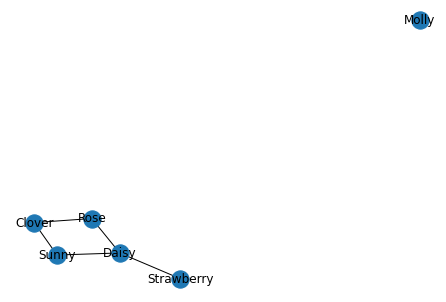

In [214]:

nx.draw(G_mixed,with_labels = True)


In [215]:
data

,name,race,age,milk/d,character,music
0,Clover,Holstein,2,20,lively,rock
1,Sunny,Ayrshire,2,10,kind,rock
2,Rose,Holstein,5,15,calm,country
3,Daisy,Ayrshire,4,25,calm,classical
4,Strawberry,Finncattle,7,35,calm,classical
5,Molly,Ayrshire,8,45,kind,country


* We can't rely on Numerical distance clusters because from the graph we see that Strawberry and Molly is in same cluster while they don't share any of the categorical feautures (which is 3/5  of the feautures). I think the more realiable clustering would be mixed distance clustering since it takes into consideration all of the feautures and with bigger data sets it would create more decent clusters than the others.Molly has very big distance from everyone (except Strawberry) because of its numerical feautures and even with Strawberry it doesn't share any categorical feauture. We also can't rely on categorical clusters because even though Daisy and Strawberry are very close because of categorical features it would show the same clustering even if their numerical features would differ by 100 times. 
* In conclusion, Clustering on mixed distance values is more reliable